# 시계열 데이터분석 실습

## 데이터(Google Trend)
구글 트랜드는 어떤 주제나 검색어가 시간에 따라 얼마나 인기가 있는지, 지역별로 어떤 트렌드를 보이는지를 확인할 수 있는 구글의 무료 도구입니다. 이 도구를 통해 사용자들은 다양한 검색어의 인기도를 비교하거나 특정 시기나 지역에서의 검색 트렌드를 파악할 수 있습니다.

### 주요 기능

1. 시간에 따른 검색어 인기도 확인:
> 특정 검색어가 최근에 인기가 있는지, 과거에는 어떠한지를 그래프로 확인할 수 있습니다.

2. 지역별 검색어 인기도 비교:
> 특정 검색어가 어느 지역에서 가장 인기가 있는지, 지역별로 어떤 검색어가 뜨고 있는지를 확인할 수 있습니다.

3. 관련 검색어 파악:
> 주요 검색어와 관련된 다른 검색어들의 인기도를 함께 파악할 수 있습니다. 이를 통해 관련 주제나 키워드를 발견할 수 있습니다.

4. 카테고리 및 시장 세분화:
> 구글 트랜드는 다양한 카테고리와 시장에 따른 검색 트렌드를 제공합니다. 이를 통해 특정 산업이나 분야에서의 인기 키워드를 파악할 수 있습니다.

계절성이 있는 데이터를 가져오기 위해 계절성이 확실한 <b>수영복</b>을 키워드로 데이터를 구글 트랜드에서 가져왔습니다. [링크](https://trends.google.com/trends/explore?date=all&geo=KR&q=%EC%88%98%EC%98%81%EB%B3%B5&hl=ko)

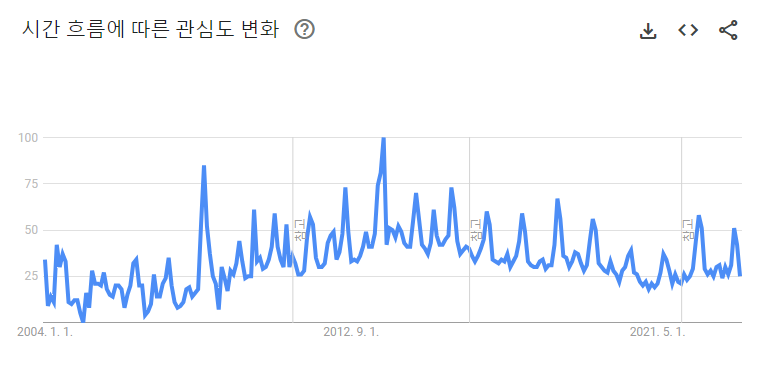

## Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# 본인이 저장한 경로로부터 데이터 읽기
df = pd.read_csv('/content/drive/MyDrive/MyLecture/시계열데이터분석/수영복_GoogleTrend.csv')

print(df.columns)
df.info()

Index(['month', 'swimsuit'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   month     237 non-null    object
 1   swimsuit  237 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.8+ KB


In [ ]:
df

,month,swimsuit
0,04-Jan,34
1,04-Feb,9
2,04-Mar,14
3,04-Apr,11
4,04-May,42
...,...,...
232,23-May,26
233,23-Jun,31
234,23-Jul,51
235,23-Aug,42


# 시계열 분석이란?

- 시계열 분석은 시계열 데이터를 분석하는 것으로 시계열 예측으로도 부릅니다.
- 시계열 데이터(time series)는 관측치가 시간적 순서를 가지는 시간의 흐름에 따른 관측된 데이터입니다.

## 시계열 데이터 특징

시간의 흐름에 따라 순서대로 관측되어 시간의 영향을 받게되는 데이터

- Daily (일)
- Monthly (달)
- Quarterly (분기)
- Yearly (년)

시계열 데이터로는 다음과 같은 데이터들이 존재합니다.
- <b>시간에 따른 제품의 판매량</b>
- <b>시간에 따른 실업자 수</b>
- <b>시간에 따른 서울시 오염 정도</b>
- <b>시간에 따른 특정 제품의 재고량</b>


## 시계열 데이터 구성요소
- 추세 변동 (Trend)
> 시간이 경과함에 따라 관측값이 지속적으로 증가하거나 감소하
는 추세를 갖는 경우의 변동

- 순환 변동 (Cycle)
> 주기적인 변화를 가지나 계절에 의한 것이 아니고 주기가 긴 경우
의 변동

- 계절 변동 (Seasonal Variations)
> 주별, 월별, 계절별과 같이 주기적인 요인에 의한 변동

- 우연 변동 (Random Flunctions)
> 시간에 따른 규칙적인 움직임과는 무관하게 랜덤한 원인에 의해 나타나는 변동


## 예측오차 (Prediction Error)

특정 예측에 대한 예측 오차는 $\hat{y}_t$ 입니다. 실제값과 예측값의 단순한 차이를 나타냅니다.

$e_{t} = y_t - \hat{y}_t$

> $y_t$ : t에서의 실제값

> $\hat{y}_t$ : t에서의 예측값

## 시계열 데이터 분석 Task
시계열 데이터 분석 Task는 크게 세가지 Task로 구분할 수 있습니다.

1. Time Series Forecasting (시계열 예측)
시계열 예측은 과거의 데이터를 기반으로 미래의 데이터 포인트를 예측하는 작업입니다. 이는 주식 시장, 날씨 예측, 매출 예측 등 다양한 분야에서 활용됩니다.

```
예시:

- 기업의 다음 분기 매출 예측
- 다음 주의 날씨 예측
- 특정 주식의 미래 가격 예측
```

2. Time Series Classification (시계열 분류)

시계열 분류는 주어진 시계열 데이터를 특정 카테고리나 클래스로 분류하는 작업입니다. 예를 들어, 심전도(ECG) 데이터를 기반으로 환자의 심장 상태를 정상 또는 비정상으로 분류할 수 있습니다.

```
예시:

- 심전도(ECG) 데이터를 사용하여 환자의 심장 상태 분류 (정상 vs. 부정맥)
- 센서 데이터를 기반으로 기계의 작동 상태 분류 (정상 작동 vs. 고장)
```

3. Time Series Anomaly Detection (시계열 이상 탐지)
시계열 이상 탐지는 시계열 데이터에서 비정상적인 패턴이나 이상치를 탐지하는 작업입니다. 이는 시스템 모니터링, 사기 탐지, 산업 공정 모니터링 등에서 중요한 역할을 합니다.

```
예시:

- 신용 카드 거래 데이터에서 사기 거래 탐지
- 웹 서버 로그에서 비정상 트래픽 패턴 탐지
- 제조 공정 데이터에서 품질 이상 탐지
```

## 시계열 용어 정리

### 차분(Difference)
> 차분은 시계열 데이터에서 연속된 관측치 사이의 변화를 측정하는 방법입니다. 이는 현재 값에서 이전 값(또는 지정된 시간 단위 이전의 값)을 뺀 결과로 계산됩니다. 차분을 사용하면 시계열 데이터의 정상성을 달성하거나 시즌성을 제거할 수 있습니다.

### 역차분(Inverse Difference)
> 역차분은 차분의 반대 작업입니다. 차분된 데이터를 원래의 시계열 데이터로 되돌리는 데 사용됩니다.

### 평활화(Smoothing)
> 시계열 데이터의 잡음을 줄이기 위해 사용되는 방법입니다. 이는 이동 평균 또는 지수 평활과 같은 방법으로 수행될 수 있습니다.

### 필터링(Filtering)
> 특정 주파수 성분을 제거하거나 강조하기 위해 사용되는 방법입니다.

### 요소분해(Decomposition)
> 시계열 데이터를 여러 구성 요소로 분해하는 방법입니다. 일반적으로 추세, 계절성, 잔차로 분해됩니다.

### 시계열 상관관계(Serial Correlation)
> 시계열 데이터의 연속된 관측치 사이의 상관 관계를 측정하는 방법입니다. 이는 자기 상관 함수(ACF) 또는 부분 자기 상관 함수(PACF)를 사용하여 시각화될 수 있습니다.

## 시계열 데이터 분석 패키지 설치

In [ ]:
!pip install -q pandas numpy statsmodels matplotlib

## 시계열 데이터와 친해지기

시계열 데이터는 시간 순서대로 정렬된 데이터를 의미합니다. 이러한 데이터를 분석하고 처리하기 위한 다양한 방법들이 있습니다. 여기서는 몇 가지 기본적인 방법들을 살펴보겠습니다.

In [ ]:
print(df.columns)
df.head()

Index(['month', 'swimsuit'], dtype='object')


,month,swimsuit
0,04-Jan,34
1,04-Feb,9
2,04-Mar,14
3,04-Apr,11
4,04-May,42


            swimsuit
date                
2004-01-01        34
2004-02-01         9
2004-03-01        14
2004-04-01        11
2004-05-01        42


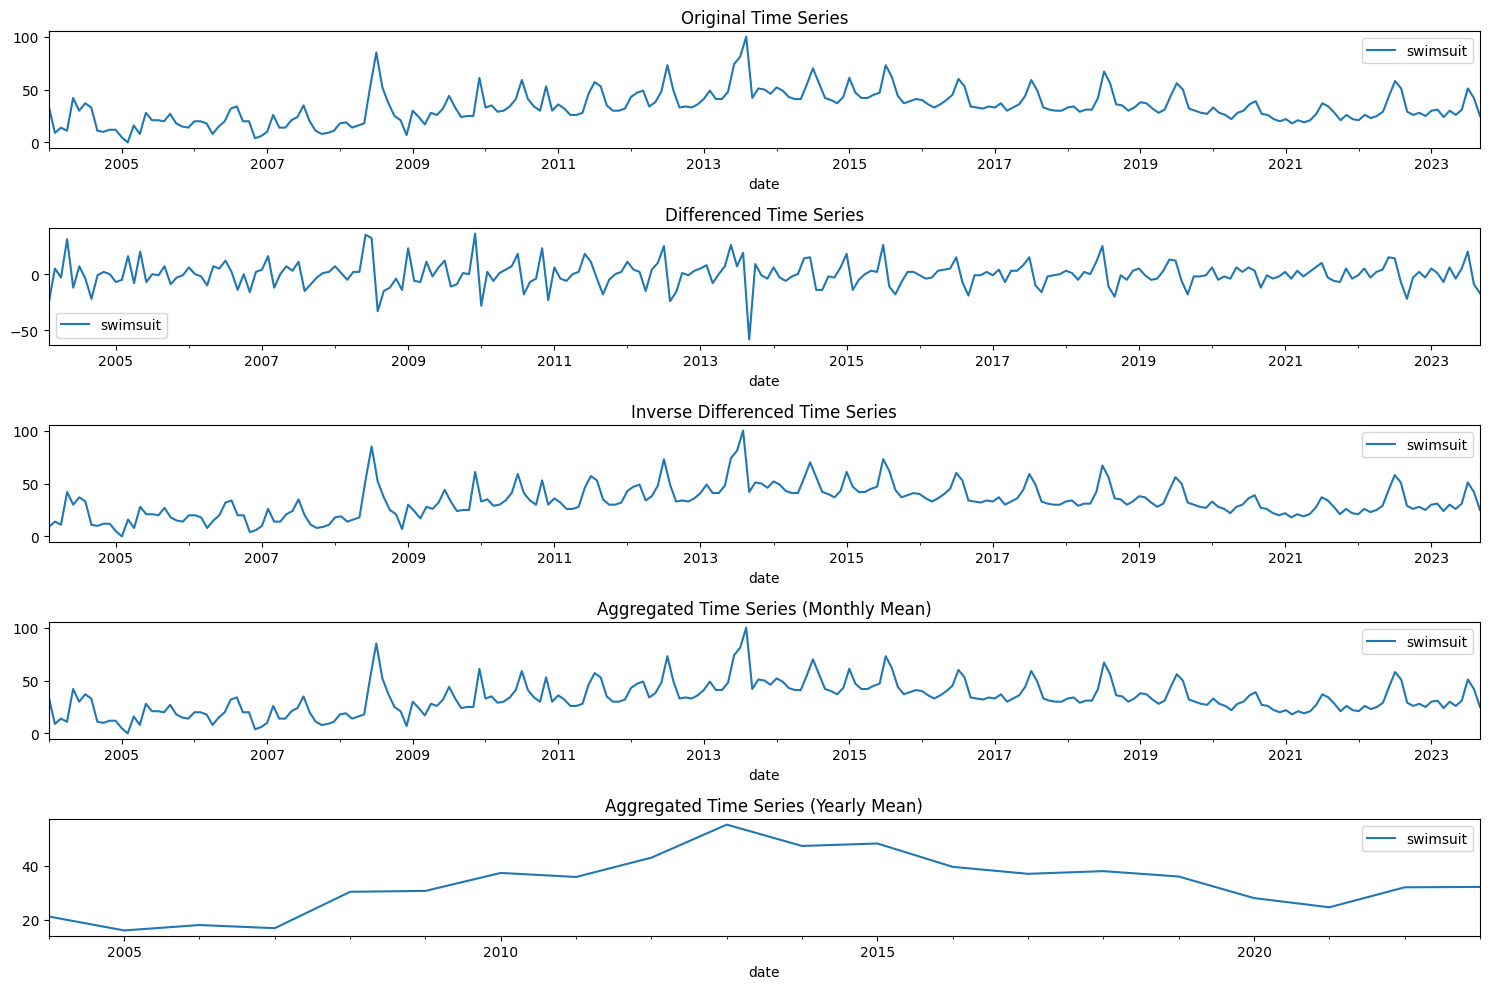

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 수영복 데이터 불러오기
# CSV 파일 읽기
ts_data = pd.read_csv('/content/drive/MyDrive/MyLecture/시계열데이터분석/수영복_GoogleTrend.csv')

# 'date' 컬럼을 Datetime 형식으로 변환
ts_data['date'] = pd.to_datetime(ts_data['date'])

# 'date' 컬럼을 인덱스로 설정
ts_data.set_index('date', inplace=True)
print(ts_data.head())

# 차분
diff_data = ts_data.diff().dropna()

# 역차분
diffinv_data = diff_data.cumsum() + ts_data.iloc[0]

# 시계열 통합
monthly_data = ts_data.resample('M').mean()
yearly_data = ts_data.resample('Y').mean()


# 결과 시각화
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15, 10))
ts_data.plot(ax=axes[0], title='Original Time Series')
diff_data.plot(ax=axes[1], title='Differenced Time Series')
diffinv_data.plot(ax=axes[2], title='Inverse Differenced Time Series')
monthly_data.plot(ax=axes[3], title='Aggregated Time Series (Monthly Mean)')
yearly_data.plot(ax=axes[4], title='Aggregated Time Series (Yearly Mean)')
plt.tight_layout()
plt.show()


## 시계열 데이터의 EDA

시계열 데이터의 탐색적 데이터 분석(EDA)는 데이터의 패턴, 추세, 계절성, 노이즈 등을 파악하는 데 중요합니다. 여기서는 몇 가지 기본적인 방법들을 살펴보겠습니다.

### Trend, Seasonal, Residual

1. **Original Time Series**:
   - 이 플롯은 원본 시계열 데이터를 나타냅니다.
   - 시간에 따른 데이터의 변화와 패턴을 관찰할 수 있습니다.

2. **Smoothed Time Series (Rolling Mean)**:
   - 이 플롯은 시계열 데이터의 이동 평균(rolling mean)을 나타냅니다.
   - 이동 평균은 데이터의 잡음을 줄이고 전반적인 트렌드를 더 잘 파악하기 위해 사용됩니다.
   - 주어진 `window` 값에 따라 각 시점에서 그 전의 `window` 개의 데이터 포인트의 평균을 계산합니다.

3. **Trend Component**:
   - 이 플롯은 시계열 데이터의 추세(trend) 구성 요소를 나타냅니다.
   - 추세는 시계열 데이터의 장기적인 패턴 또는 방향을 나타냅니다.
   - 예를 들어, 연간 판매량이 지속적으로 증가하거나 감소하는 경우 그것은 추세로 볼 수 있습니다.

4. **Seasonal Component**:
   - 이 플롯은 시계열 데이터의 계절성(seasonality) 구성 요소를 나타냅니다.
   - 계절성은 일정한 주기로 반복되는 패턴을 나타냅니다. 예를 들어, 매년 여름에 판매량이 증가하는 경우, 그것은 계절성의 한 예입니다.
   - 계절성은 일일, 주간, 월간, 연간 등 다양한 주기를 가질 수 있습니다.

5. **Residual Component**:
   - 이 플롯은 시계열 데이터의 잔차(residual) 구성 요소를 나타냅니다.
   - 잔차는 원본 데이터에서 추세와 계절성을 제거한 후 남은 부분입니다.
   - 잔차는 모델의 예측 오차나 데이터의 노이즈를 나타낼 수 있습니다.



### ACF, PACF

다음은 시계열 데이터의 자기상관 함수(Autocorrelation Function, ACF)와 부분 자기상관 함수(Partial Autocorrelation Function, PACF)를 시각화하는 것입니다. 이러한 플롯들은 시계열 데이터의 패턴과 구조를 이해하는 데 도움을 주며, ARIMA와 같은 시계열 모델링에 필요한 매개변수를 결정하는 데 유용합니다.

1. **자기상관 함수 (ACF)**:
   - ACF는 시계열 데이터의 현재 값과 이전의 값들 사이의 상관관계를 나타냅니다.
   - x축은 'lag'를 나타내며, y축은 상관계수를 나타냅니다.
   - Lag 0에서의 ACF 값은 항상 1입니다.
   - ACF 플롯에서 점선은 통계적으로 유의미한 상관관계의 경계를 나타냅니다. 이 경계를 벗어나는 값들은 통계적으로 유의미한 상관관계를 가집니다.
   - ACF 플롯은 MA 모델의 차수를 결정하는 데 도움을 줄 수 있습니다.

2. **부분 자기상관 함수 (PACF)**:
   - PACF는 시계열 데이터의 현재 값과 이전의 값들 사이의 상관관계를 나타내되, 중간의 값들의 영향을 제거한 상관관계를 나타냅니다.
   - PACF 플롯에서도 x축은 'lag'를 나타내며, y축은 상관계수를 나타냅니다.
   - PACF 플롯에서 점선은 마찬가지로 통계적으로 유의미한 상관관계의 경계를 나타냅니다.
   - PACF 플롯은 AR 모델의 차수를 결정하는 데 도움을 줄 수 있습니다.

해석 방법:
- ACF가 천천히 감소하고 PACF가 특정 lag에서 절단된다면, AR 모델의 차수를 고려해볼 수 있습니다.
- ACF가 특정 lag에서 절단되고 PACF가 천천히 감소한다면, MA 모델의 차수를 고려해볼 수 있습니다.

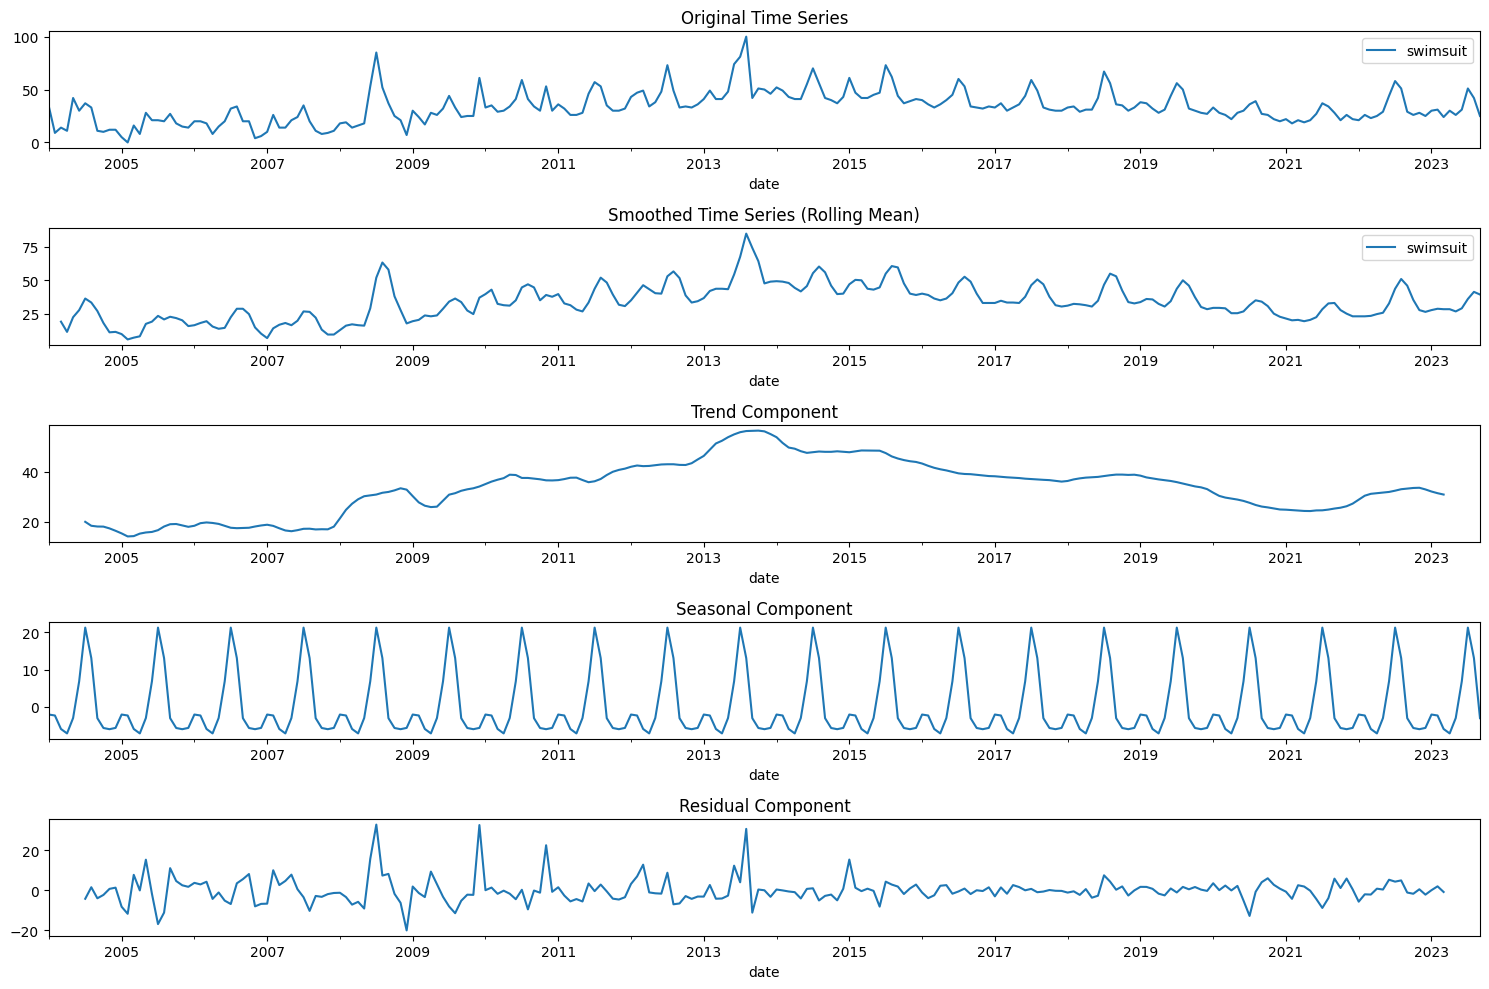

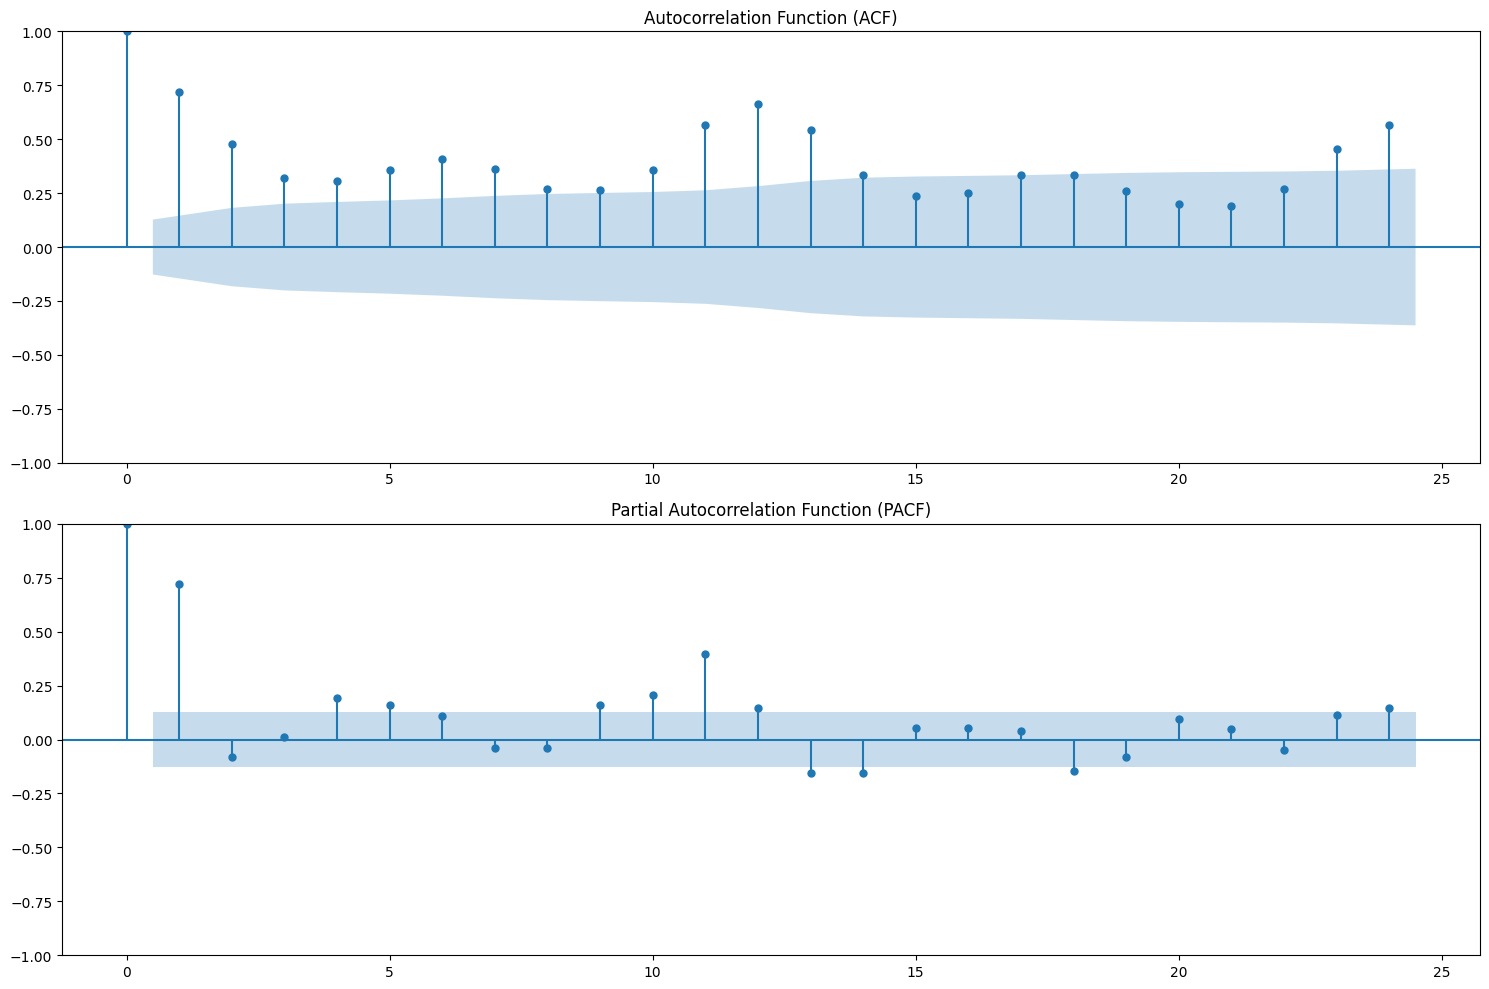

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 평활화
rolling_mean = ts_data.rolling(window=3).mean()

# 요소분해
decomposition = seasonal_decompose(ts_data, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# 결과 시각화
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15, 10))
ts_data.plot(ax=axes[0], title='Original Time Series')
rolling_mean.plot(ax=axes[1], title='Smoothed Time Series (Rolling Mean)')
trend.plot(ax=axes[2], title='Trend Component')
seasonal.plot(ax=axes[3], title='Seasonal Component')
residual.plot(ax=axes[4], title='Residual Component')
plt.tight_layout()
plt.show()

# 시계열 상관관계
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
plot_acf(ts_data, ax=axes[0], title='Autocorrelation Function (ACF)')
plot_pacf(ts_data, ax=axes[1], title='Partial Autocorrelation Function (PACF)')
plt.tight_layout()
plt.show()